# 펭귄 성별 분류하기


## 라이브러리 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 파일 읽어 오기

In [2]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length,culmen_depth,flipper_length,body_mass,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## 데이터 확인하기

In [3]:
df.columns

Index(['species', 'island', 'culmen_length', 'culmen_depth', 'flipper_length',
       'body_mass', 'sex'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         344 non-null    object 
 1   island          344 non-null    object 
 2   culmen_length   342 non-null    float64
 3   culmen_depth    342 non-null    float64
 4   flipper_length  342 non-null    float64
 5   body_mass       342 non-null    float64
 6   sex             333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.shape

(344, 7)

In [6]:
df_sex = df['sex'].value_counts()
df_sex

MALE      168
FEMALE    165
Name: sex, dtype: int64

<AxesSubplot:>

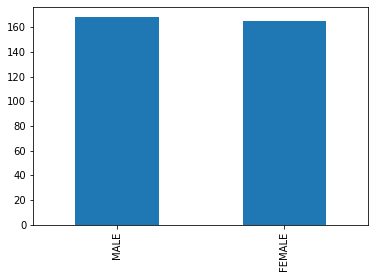

In [7]:
df['sex'].value_counts().plot(kind='bar')

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64


<AxesSubplot:>

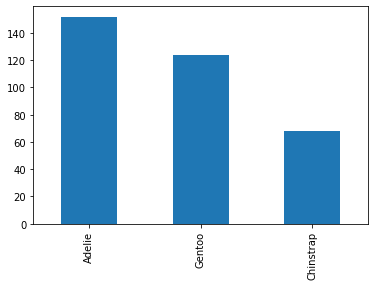

In [8]:
df_species = df['species'].value_counts()
print(df_species)
df['species'].value_counts().plot(kind='bar')

## 데이터 정제

In [9]:
df.isnull().sum()

species            0
island             0
culmen_length      2
culmen_depth       2
flipper_length     2
body_mass          2
sex               11
dtype: int64

In [10]:
df = df.dropna()
df.isnull().sum()

species           0
island            0
culmen_length     0
culmen_depth      0
flipper_length    0
body_mass         0
sex               0
dtype: int64

In [11]:
df = df.replace({'MALE':1, 'FEMALE' :0})
df

,species,island,culmen_length,culmen_depth,flipper_length,body_mass,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,0


## 기계학습 데이터 준비

In [12]:
X = df[['culmen_length','culmen_depth','flipper_length','body_mass']]
y = df['sex']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state = 42)

### knn모델 학습하기

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

In [15]:
df_result = pd.DataFrame(columns=['Actual', 'Predicted'])
df_result['Actual'] = y_test
df_result['Predicted'] = y_pred
df_result\

print("정확도: ", model_knn.score(X_test, y_test))

정확도:  0.83


In [16]:
df_matrix= confusion_matrix(y_test, y_pred)
df_matriｘ

array([[38, 10],
       [ 7, 45]], dtype=int64)

Text(33.0, 0.5, 'Actual')

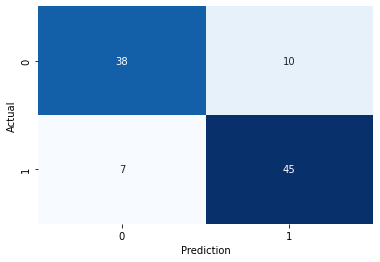

In [17]:
import seaborn as sns
ax = sns.heatmap(df_matrix,annot=True,fmt='d',cbar=False,cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

In [18]:
print("정확도: ", accuracy_score(y_test, y_pred))
print("정밀도: ", precision_score(y_test, y_pred))
print("재현율: ", recall_score(y_test, y_pred))
print("F1-Score: ",f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

정확도:  0.83
정밀도:  0.8181818181818182
재현율:  0.8653846153846154
F1-Score:  0.8411214953271028
              precision    recall  f1-score   support

           0       0.84      0.79      0.82        48
           1       0.82      0.87      0.84        52

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



In [19]:
df_conf = pd.DataFrame(df_matrix).rename(index={0:'실제값(M)', 1:'실제값(F)'},
                               columns ={0:'예측값(M)', 1:'예측값(F)'})
df_conf

,예측값(M),예측값(F)
실제값(M),38,10
실제값(F),7,45


### 다양한 분류 모델 학습

In [21]:
!pip install xgboost

In [38]:
#xgboost 설치가 잘 안되면 Anaconda Powershell Prompt(anaconda3)에서 해봅니다.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


#여러 모델을 append해서 추가합니다. 
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))  # LDA 모델
models.append(('KNN', KNeighborsClassifier()))  # KNN 모델
models.append(('CART', DecisionTreeClassifier()))  # 의사결정트리 모델
models.append(('NB', GaussianNB()))  # 가우시안 나이브 베이즈 모델
models.append(('RF', RandomForestClassifier()))  # 랜덤포레스트 모델
models.append(('SVM', SVC(gamma='auto')))  # SVM 모델
models.append(('XGB', XGBClassifier()))  # XGB 모델

for name, model in models:
    # fit으로 학습을 합니다. 
    model.fit(X_train, y_train)
    
    # %s와 %f는 문자열 포맷팅으로 %s는 문자열, %f는 숫자형 데이터를 말합니다. 
    # 문자열 포맷팅 값은 괄호()안의 값과 대응됩니다.
    # score 함수를 사용하여 모델의 성능을 확인합니다.
    msg = "%s - train_score : %f, test score : %f" % (name, model.score(X_train, y_train), model.score(X_test, y_test))
    print(msg)

LDA - train_score : 0.901288, test score : 0.890000
KNN - train_score : 0.806867, test score : 0.830000
CART - train_score : 1.000000, test score : 0.880000
NB - train_score : 0.729614, test score : 0.640000
RF - train_score : 1.000000, test score : 0.910000
SVM - train_score : 1.000000, test score : 0.590000
XGB - train_score : 1.000000, test score : 0.910000


## 평가 및 예측

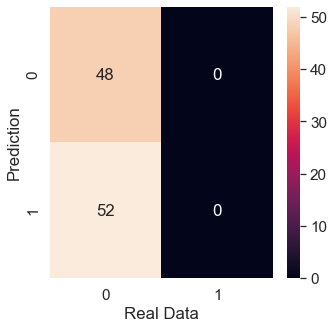

array([[48,  0],
       [52,  0]], dtype=int64)

In [34]:
# XGBClassifier의 x_test에 대한 예측값을 구하고 confusion_matrix() 를 사용하면 confusion matrix를 구할 수 있습니다.
model_predition_xgb= models[-1][1].predict(X_test)

# sklearn에서 제공하는 confusion_matrix를 사용합니다.
cm_xgb = confusion_matrix(y_test, model_predition_xgb)

# 출력 파트 - seaborn의 heatmap을 사용
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(cm, annot=True)
plt.xlabel('Real Data')
plt.ylabel('Prediction')
plt.show()
cm


In [42]:
X_test

,culmen_length,culmen_depth,flipper_length,body_mass
30,39.5,16.7,178.0,3250.0
317,46.9,14.6,222.0,4875.0
79,42.1,19.1,195.0,4000.0
201,49.8,17.3,198.0,3675.0
63,41.1,18.2,192.0,4050.0
...,...,...,...,...
20,37.8,18.3,174.0,3400.0
7,39.2,19.6,195.0,4675.0
215,55.8,19.8,207.0,4000.0
99,43.2,18.5,192.0,4100.0
